In [1]:
! pip install segmentation_models

     |████████████████████████████████| 50 kB 477 kB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 261 kB/s eta 0:00:01
     |████████████████████████████████| 195 kB 301 kB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 360 kB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 91 kB/s eta 0:00:012
     |████████████████████████████████| 3.4 MB 99 kB/s eta 0:00:014


In [1]:
import tensorflow as tf
import segmentation_models as sm
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import os

2022-05-18 17:10:46.023284: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


Segmentation Models: using `tf.keras` framework.


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download visweshn/acdc-dataset

  7% 1.17G/15.7G [00:09<01:55, 135MB/s]
User cancelled operation


In [ ]:
! unzip acdc-dataset

Streaming output truncated to the last 5000 lines.
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000191_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000195_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000198_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000200_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000202_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000204_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000214_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000216_rgb_anon.png  
  inflating: rgb_anon_trainvaltest/rgb_anon/night/train/GOPR0351/GOPR0351_frame_000226_rgb_anon.png  
  inflating: rgb_anon_trainvalt

In [2]:
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [3]:
SIZE_X = 256
SIZE_Y = 256

In [4]:
from collections import defaultdict

In [5]:
season = ['fog', 'night', 'rain', 'snow']
train_images=[]

for i in range(4):
  path = f"data/acdc/rgb_anon/{season[i]}/train"
  for (root, dirs, files) in os.walk(path):
    for file in files:
      train_images.append((path, season[i], file))

len(train_images)

1600

In [6]:
train_images[1]

('data/acdc/rgb_anon/fog/train', 'fog', 'GP020478_frame_000326_rgb_anon.png')

In [7]:
mask_image_files = defaultdict(list)

for i in range(4):
  path = f"data/acdc/gt/{season[i]}/train/"
  for root, dirs, files in os.walk(path):
    for file in files:
      file_name = file.split('_')
      key = season[i] + '-' + file_name[0] + '-' + file_name[2]
      mask_image_files[key].append((path, season[i], file))

len(list(mask_image_files.keys()))

1600

In [8]:
mask_name = 'labelColor.png'

# list of tuples (image, mask)
my_images = []

for path, season, file in train_images:
  file_name = file.split('_')
  key = season + '-' + file_name[0] + '-' + file_name[2]
  masks = mask_image_files[key]
  for mask_path, mask_season, mask_image in masks:
    x = mask_image.split('_')[-1]
    if x == mask_name:
      my_images.append((path + '/' + file_name[0] + '/' + file, mask_path  + '/' + file_name[0] + '/' + mask_image, season))


print(len(my_images))

1600


In [9]:
my_images[0]

('data/acdc/rgb_anon/fog/train/GP020478/GP020478_frame_000126_rgb_anon.png',
 'data/acdc/gt/fog/train//GP020478/GP020478_frame_000126_gt_labelColor.png',
 'fog')

In [11]:
season = ['fog', 'night', 'rain', 'snow']
val_images=[]

for i in range(4):
  path = f"data/acdc/rgb_anon/{season[i]}/val"
  for (root, dirs, files) in os.walk(path):
    for file in files:
      val_images.append((path, season[i], file))

len(val_images)

406

In [12]:
mask_val_image_files = defaultdict(list)

for i in range(4):
  path = f"data/acdc/gt/{season[i]}/val/"
  for root, dirs, files in os.walk(path):
    for file in files:
      file_name = file.split('_')
      key = season[i] + '-' + file_name[0] + '-' + file_name[2]
      mask_val_image_files[key].append((path, season[i], file))


len(list(mask_val_image_files.keys()))

406

In [13]:
mask_name = 'labelColor.png'

# list of tuples (image, mask)
my_val_images = []

for path, season, file in val_images:
  file_name = file.split('_')
  key = season + '-' + file_name[0] + '-' + file_name[2]
  masks = mask_val_image_files[key]
  for mask_path, mask_season, mask_image in masks:
    x = mask_image.split('_')[-1]
    if x == mask_name:
      my_val_images.append((path + '/' + file_name[0] + '/' + file, mask_path  + '/' + file_name[0] + '/' + mask_image, season))

print(len(my_val_images))

406


In [14]:
my_val_images[0]

('data/acdc/rgb_anon/fog/val/GP020475/GP020475_frame_000054_rgb_anon.png',
 'data/acdc/gt/fog/val//GP020475/GP020475_frame_000054_gt_labelColor.png',
 'fog')

In [ ]:
!kaggle kernels output balraj98/unet-with-pretrained-resnet50-encoder-pytorch -p "./unet"

Output file downloaded to ./unet/best_model.pth
Output file downloaded to ./unet/dice_loss_plot.png
Output file downloaded to ./unet/iou_score_plot.png
Output file downloaded to ./unet/sample_predictions/sample_pred_0.png
Output file downloaded to ./unet/sample_predictions/sample_pred_1.png
Output file downloaded to ./unet/sample_predictions/sample_pred_2.png
Output file downloaded to ./unet/sample_predictions/sample_pred_3.png
Output file downloaded to ./unet/sample_predictions/sample_pred_4.png
Output file downloaded to ./unet/sample_predictions/sample_pred_5.png
Output file downloaded to ./unet/sample_predictions/sample_pred_6.png
Output file downloaded to ./unet/sample_predictions/sample_pred_7.png
Output file downloaded to ./unet/sample_predictions/sample_pred_8.png
Output file downloaded to ./unet/sample_predictions/sample_pred_9.png
Kernel log downloaded to ./unet/unet-with-pretrained-resnet50-encoder-pytorch.log 


In [ ]:
!mkdir /content/all_train
!mkdir /content/all_mask
!mkdir /content/all_val
!mkdir /content/all_val_mask

# !mkdir /content/all_train/fog
# !mkdir /content/all_train/night
# !mkdir /content/all_train/rain
# !mkdir /content/all_train/snow

# !mkdir /content/all_mask/fog
# !mkdir /content/all_mask/night
# !mkdir /content/all_mask/rain
# !mkdir /content/all_mask/snow

# !mkdir /content/all_val/fog
# !mkdir /content/all_val/night
# !mkdir /content/all_val/rain
# !mkdir /content/all_val/snow

# !mkdir /content/all_val_mask/fog
# !mkdir /content/all_val_mask/night
# !mkdir /content/all_val_mask/rain
# !mkdir /content/all_val_mask/snow

In [ ]:
import shutil

In [ ]:
for image_file, mask_file, season in my_images:
  
  image_name = image_file.split('/')[-1]
  mask_name = image_file.split('/')[-1]

  target_image = f'/content/all_train/{image_name}'
  target_mask = f'/content/all_mask/{mask_name}'

  shutil.copyfile(image_file, target_image)
  shutil.copyfile(mask_file, target_mask)

KeyboardInterrupt: ignored

In [ ]:
for image_file, mask_file, season in my_val_images:
  
  image_name = image_file.split('/')[-1]
  mask_name = image_file.split('/')[-1]

  target_image = f'/content/all_val/{image_name}'
  target_mask = f'/content/all_val_mask/{mask_name}'

  shutil.copyfile(image_file, target_image)
  shutil.copyfile(mask_file, target_mask)

In [ ]:
# sm.set_framework('tf.keras')
# sm.framework()

'tf.keras'

In [16]:
import torch

In [17]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [15]:
!pip install -q -U segmentation-models-pytorch albumentations > /dev/null
import segmentation_models_pytorch as smp

/home/mh05205/anaconda3/envs/tf-gpu/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = torch.load('unet/best_model.pth', map_location=DEVICE)

In [18]:
class_rgb_values = [(128, 64,128), (244, 35,232), (244, 35,232), (102,102,156), (190,153,153), (153,153,153), (250,170, 30), (220,220,  0), (107,142, 35), (152,251,152), ( 70,130,180), (220, 20, 60), (255,  0,  0), (  0,  0,142), (  0,  0, 70), (  0, 60,100), (  0, 80,100), (  0,  0,230), (119, 11, 32)  ]
class_rgb_values = [list(i) for i in class_rgb_values]

In [19]:
ENCODER = 'resnet50'
ENCODER_WEIGHTS = 'imagenet'
# CLASSES = class_names
ACTIVATION = 'softmax2d' # could be None for logits or 'softmax2d' for multiclass segmentation
model = smp.Unet(
    encoder_name=ENCODER, 
    encoder_weights=ENCODER_WEIGHTS, 
    classes=len(class_rgb_values), 
    activation=ACTIVATION,
)
# create segmentation model with pretrained encoder

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

In [20]:
loss = smp.utils.losses.DiceLoss()

# define metrics
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

# define optimizer
optimizer = torch.optim.Adam([ 
    dict(params=model.parameters(), lr=0.0001),
])

# define learning rate scheduler (not used in this NB)
lr_scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    optimizer, T_0=1, T_mult=2, eta_min=5e-5,
)

In [21]:
def visualize(**images):
    """
    Plot images in one row
    """
    n_images = len(images)
    plt.figure(figsize=(20,8))
    for idx, (name, image) in enumerate(images.items()):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); 
        plt.yticks([])
        # get title from the parameter names
        plt.title(name.replace('_',' ').title(), fontsize=20)
        plt.imshow(image)
    plt.show()

# Perform one hot encoding on label
def one_hot_encode(label, label_values):
    """
    Convert a segmentation image label array to one-hot format
    by replacing each pixel value with a vector of length num_classes
    # Arguments
        label: The 2D array segmentation image label
        label_values
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of num_classes
    """
    semantic_map = []
    for colour in label_values:
        equality = np.equal(label, colour)
        class_map = np.all(equality, axis = -1)
        semantic_map.append(class_map)
        
    semantic_map = np.stack(semantic_map, axis=-1)
    
    return semantic_map
    
# Perform reverse one-hot-encoding on labels / preds
def reverse_one_hot(image):
    """
    Transform a 2D array in one-hot format (depth is num_classes),
    to a 2D array with only 1 channel, where each pixel value is
    the classified class key.
    # Arguments
        image: The one-hot format image 
        
    # Returns
        A 2D array with the same width and hieght as the input, but
        with a depth size of 1, where each pixel value is the classified 
        class key.
    """
    x = np.argmax(image, axis = -1)
    return x

# Perform colour coding on the reverse-one-hot outputs
def colour_code_segmentation(image, label_values):
    """
    Given a 1-channel array of class keys, colour code the segmentation results.
    # Arguments
        image: single channel array where each value represents the class key.
        label_values

    # Returns
        Colour coded image for segmentation visualization
    """
    colour_codes = np.array(label_values)
    x = colour_codes[image.astype(int)]

    return x

In [22]:
image_lst = [image[0] for image in my_images]
mask_lst = [image[1] for image in my_images]

In [23]:
image_vallst = [image[0] for image in my_val_images]
mask_vallst = [image[1] for image in my_val_images]

In [24]:
len(image_lst)

1600

In [25]:
class BuildingsDataset(torch.utils.data.Dataset):

    """Massachusetts Buildings Dataset. Read images, apply augmentation and preprocessing transformations.
    
    Args:
        images_dir (list): list of images 
        masks_dir (list): list of segmentation masks
        class_rgb_values (list): RGB values of select classes to extract from segmentation mask
        augmentation (albumentations.Compose): data transfromation pipeline 
            (e.g. flip, scale, etc.)
        preprocessing (albumentations.Compose): data preprocessing 
            (e.g. noralization, shape manipulation, etc.)
    
    """
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            class_rgb_values=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        
        self.image_paths = images_dir
        self.mask_paths = masks_dir

        self.class_rgb_values = class_rgb_values
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read images and masks
        image = cv2.cvtColor(cv2.imread(self.image_paths[i]), cv2.COLOR_BGR2RGB)
        mask = cv2.cvtColor(cv2.imread(self.mask_paths[i]), cv2.COLOR_BGR2RGB)
        
        # one-hot-encode the mask
        mask = one_hot_encode(mask, self.class_rgb_values).astype('float')
        mask = np.clip(mask, 0, 18)
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        # return length of 
        return len(self.image_paths)

In [26]:
import random

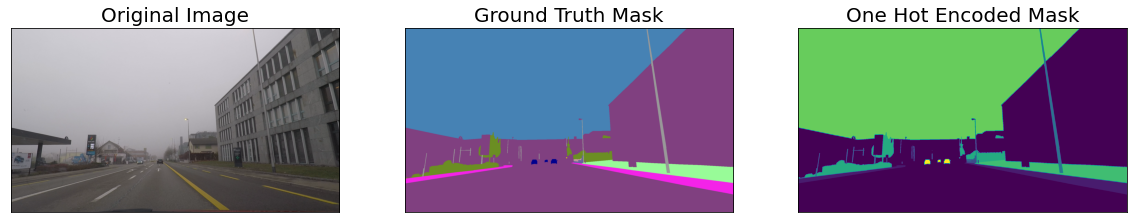

In [27]:
dataset = BuildingsDataset(image_lst, mask_lst, class_rgb_values=class_rgb_values)
random_idx = random.randint(0, len(dataset)-1)
image, mask = dataset[2]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [28]:
from torch.utils.data import DataLoader
import albumentations as album

In [29]:
def get_training_augmentation():
    train_transform = [    
        album.RandomCrop(height=256, width=256, always_apply=True),
        album.OneOf(
            [
                album.HorizontalFlip(p=1),
                album.VerticalFlip(p=1),
                album.RandomRotate90(p=1),
            ],
            p=0.75,
        ),
    ]
    return album.Compose(train_transform)


def get_validation_augmentation():   
    # Add sufficient padding to ensure image is divisible by 32
    test_transform = [
        album.PadIfNeeded(min_height=1536, min_width=1536, always_apply=True, border_mode=0),
    ]
    return album.Compose(test_transform)


def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn=None):
    """Construct preprocessing transform    
    Args:
        preprocessing_fn (callable): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """   
    _transform = []
    if preprocessing_fn:
        _transform.append(album.Lambda(image=preprocessing_fn))
    _transform.append(album.Lambda(image=to_tensor, mask=to_tensor))
        
    return album.Compose(_transform)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [30]:
train_dataset = BuildingsDataset(
    image_lst, mask_lst, 
    augmentation=get_training_augmentation(),
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=class_rgb_values,
)

valid_dataset = BuildingsDataset(
    image_vallst, mask_vallst, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=class_rgb_values,
)

In [31]:
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=2)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=2)

In [50]:
len(train_loader)

100

In [32]:
train_epoch = smp.utils.train.TrainEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

In [41]:
best_iou_score = 0.0
train_logs_list, valid_logs_list = [], []

for i in range(0, 5):

    # Perform training & validation
print('\nEpoch: {}'.format(i))  
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    train_logs_list.append(train_logs)
    valid_logs_list.append(valid_logs)

    # Save model if a better val IoU score is obtained
    if best_iou_score < valid_logs['iou_score']:
        best_iou_score = valid_logs['iou_score']
        torch.save(model, './best_model.pth')
        print('Model saved!')


Epoch: 0
valid: 100%|██████████| 406/406 [05:24<00:00,  1.25it/s, dice_loss - 0.6994, iou_score - 0.3793]
Model saved!

Epoch: 1
valid: 100%|██████████| 406/406 [05:00<00:00,  1.35it/s, dice_loss - 0.562, iou_score - 0.3996] 
Model saved!

Epoch: 2
valid: 100%|██████████| 406/406 [05:08<00:00,  1.32it/s, dice_loss - 0.51, iou_score - 0.4031]  
Model saved!

Epoch: 3
valid: 100%|██████████| 406/406 [05:24<00:00,  1.25it/s, dice_loss - 0.5145, iou_score - 0.5074]
Model saved!

Epoch: 4
valid: 100%|██████████| 406/406 [04:48<00:00,  1.41it/s, dice_loss - 0.4913, iou_score - 0.3967]


In [ ]:
# model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics=['mse'])
# model.compile(optimizer = 'adam', loss=sm.losses.bce_jaccard_loss, metrics=[sm.metrics.iou_score])

In [42]:
import torch

In [44]:
if os.path.exists('./best_model.pth'):
    best_model = torch.load('./best_model.pth', map_location=DEVICE)
    print('Loaded UNet model from this run.')

Loaded UNet model from this run.


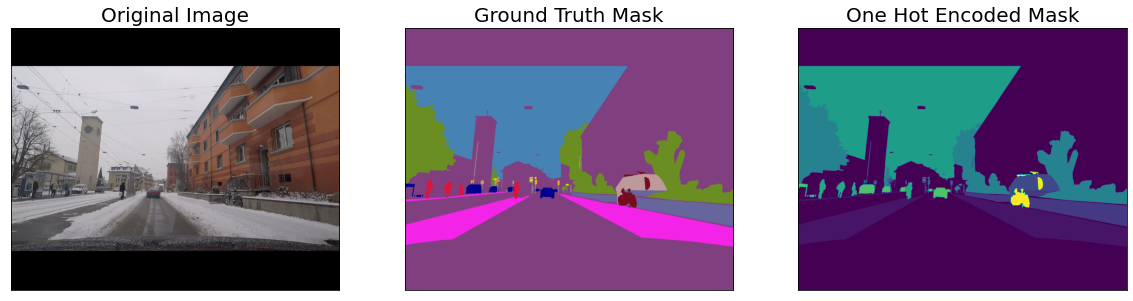

In [45]:
test_dataset_vis = BuildingsDataset(
    image_vallst, mask_vallst, 
    augmentation=get_validation_augmentation(),
    class_rgb_values=class_rgb_values,
)

# get a random test image/mask index
random_idx = random.randint(0, len(test_dataset_vis)-1)
image, mask = test_dataset_vis[random_idx]

visualize(
    original_image = image,
    ground_truth_mask = colour_code_segmentation(reverse_one_hot(mask), class_rgb_values),
    one_hot_encoded_mask = reverse_one_hot(mask)
)

In [36]:
def crop_image(image, target_image_dims=[1500,1500,3]):
   
    target_size = target_image_dims[0]
    image_size = len(image)
    padding = (image_size - target_size) // 2

    return image[
        padding:image_size - padding,
        padding:image_size - padding,
        :,
    ]

In [37]:
test_dataset = BuildingsDataset(
    image_lst, 
    mask_lst, 
    augmentation=get_validation_augmentation(), 
    preprocessing=get_preprocessing(preprocessing_fn),
    class_rgb_values=class_rgb_values,
)

test_dataloader = DataLoader(test_dataset)


In [47]:
sample_preds_folder = 'sample_predictions/'
if not os.path.exists(sample_preds_folder):
    os.makedirs(sample_preds_folder)

In [48]:
for idx in range(len(test_dataset)):

    image, gt_mask = test_dataset[idx]
    image_vis = crop_image(test_dataset_vis[idx][0].astype('uint8'))
    x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
    # Predict test image
    pred_mask = best_model(x_tensor)
    pred_mask = pred_mask.detach().squeeze().cpu().numpy()
    # Convert pred_mask from `CHW` format to `HWC` format
    pred_mask = np.transpose(pred_mask,(1,2,0))
    # Get prediction channel corresponding to building
    # pred_building_heatmap = pred_mask[:,:,select_classes.index('building')]
    pred_mask = crop_image(colour_code_segmentation(reverse_one_hot(pred_mask), class_rgb_values))
    # Convert gt_mask from `CHW` format to `HWC` format
    gt_mask = np.transpose(gt_mask,(1,2,0))
    gt_mask = crop_image(colour_code_segmentation(reverse_one_hot(gt_mask), class_rgb_values))
    cv2.imwrite(os.path.join(sample_preds_folder, f"sample_pred_{idx}.png"), np.hstack([image_vis, gt_mask, pred_mask])[:,:,::-1])
    
    # visualize(
    #     original_image = image_vis,
    #     ground_truth_mask = gt_mask,
    #     predicted_mask = pred_mask,
    #     predicted_building_heatmap = pred_building_heatmap
    # )

IndexError: list index out of range

In [ ]:
# history = model.fit(X_train,
#                     Y_train,
#                     batch_size = 8, 
#                     epochs = 10,
#                     validation_data=(x_val, y_val))

In [ ]:
# !rm -r /content/all_train/fog
# !rm -r /content/all_train/night
# !rm -r /content/all_train/rain
# !rm -r /content/all_train/snow

In [ ]:
my_images[0]

('GOPR0478_frame_000017_rgb_anon.png',
 'GOPR0478_frame_000017_gt_labelColor.png')

In [ ]:
# def helper(path):
#   lst1, lst2, lst3, lst4 = [], [], [], []

#   for image in os.walk(f'{path}/fog/'):
#     lst1.append(image)

#   for image in os.walk(f'{path}/night/'):
#     lst2.append(image)

#   for image in os.walk(f'{path}/rain/'):
#     lst3.append(image)

#   for image in os.walk(f'{path}/snow/'):
#     lst4.append(image)

#   return lst1, lst2, lst3, lst4


# train_fog, train_night, train_rain, train_snow  = helper('/content/all_train')
# train_mask_fog, train_mask_night , train_mask_rain, train_mask_snow  = helper('/content/all_mask')

# val_fog, val_night, val_rain, val_snow  = helper('/content/all_val')
# val_mask_fog, val_mask_night , val_mask_rain, val_mask_snow  = helper('/content/all_val_mask')



In [ ]:
X_train = tf.keras.utils.image_dataset_from_directory(
  '/content/all_train/',
  batch_size=32,
  image_size=(SIZE_X, SIZE_Y),
  shuffle=True,
  seed=42
)

Y_train = tf.keras.utils.image_dataset_from_directory(
  '/content/all_mask/',
  batch_size=32,
  image_size=(SIZE_X, SIZE_Y),
  shuffle=True,
  seed=42
)


X_val = tf.keras.utils.image_dataset_from_directory(
  '/content/all_val/',
  batch_size=32,
  image_size=(SIZE_X, SIZE_Y),
  shuffle=True,
  seed=42
)

Y_val = tf.keras.utils.image_dataset_from_directory(
  '/content/all_val_mask/',
  batch_size=32,
  image_size=(SIZE_X, SIZE_Y),
  shuffle=True,
  seed=42
)

Found 1600 files belonging to 4 classes.
Found 1600 files belonging to 4 classes.
Found 406 files belonging to 4 classes.
Found 406 files belonging to 4 classes.


In [ ]:
X_train = preprocess_input(X_train)
X_val = preprocess_input(X_val)

In [ ]:
# https://youtu.be/csFGTLT6_WQ
"""
Author: Dr. Sreenivas Bhattiprolu
Training and testing for semantic segmentation (Unet) of mitochondria
Uses standard Unet framework with no tricks!
Dataset info: Electron microscopy (EM) dataset from
https://www.epfl.ch/labs/cvlab/data/data-em/
Patches of 256x256 from images and labels 
have been extracted (via separate program) and saved to disk. 
This code uses 256x256 images/masks.
To annotate images and generate labels, you can use APEER (for free):
www.apeer.com 
"""
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt


In [ ]:
image_directory = '/content/all_train/'
mask_directory = '/content/all_mask/'

image_val_directory = '/content/all_val/'
image_val_mask_directory = '/content/all_val_mask/'

In [ ]:
def get_image_masks(image_directory, mask_directory):

  SIZE = 256
  image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
  mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

  images = os.listdir(image_directory + '/')
  for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
    if (image_name.split('.')[1] == 'png'):
      image = cv2.imread(image_directory + '/' + image_name, 0)
      image = Image.fromarray(image)
      image = image.resize((SIZE, SIZE))
      image_dataset.append(np.array(image))

  # Iterate through all images in Uninfected folder, resize to 64 x 64
  # Then save into the same numpy array 'dataset' but with label 1

  masks = os.listdir(mask_directory + '/')
  for i, image_name in enumerate(masks):
    if (image_name.split('.')[1] == 'png'):
      image = cv2.imread(mask_directory + '/' + image_name, 0)
      image = Image.fromarray(image)
      image = image.resize((SIZE, SIZE))
      mask_dataset.append(np.array(image))


  # Normalize images
  image_dataset = np.expand_dims(normalize(np.array(image_dataset), axis=1),3)
  # Do not normalize masks, just rescale to 0 to 1.
  mask_dataset = np.expand_dims((np.array(mask_dataset)),3) /255.

  return image_dataset, mask_dataset



In [ ]:
image_fog, mask_fog = get_image_masks(image_directory, mask_directory, 'fog')
image_val_fog, mask_val_fog = get_image_masks(image_val_directory, image_val_mask_directory, 'fog')


In [ ]:
X_train = image_fog
y_train = mask_fog

X_test = image_val_fog
y_test = mask_val_fog

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(400, 256, 256, 1)
(400, 256, 256, 1)
(100, 256, 256, 1)
(100, 256, 256, 1)


In [ ]:
season = 'fog'
SIZE = 256
image_dataset = []  #Many ways to handle data, you can use pandas. Here, we are using a list format.  
mask_dataset = []  #Place holders to define add labels. We will add 0 to all parasitized images and 1 to uninfected.

images = os.listdir(image_directory + '/' + season + '/')
for i, image_name in enumerate(images):    #Remember enumerate method adds a counter and returns the enumerate object
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(image_directory + season + '/' + image_name, 0)
    image_dataset.append((image))

masks = os.listdir(mask_directory + '/' + season)
for i, image_name in enumerate(masks):
  if (image_name.split('.')[1] == 'png'):
    image = cv2.imread(mask_directory + season + '/' + image_name, 0)
    mask_dataset.append(np.array(image))


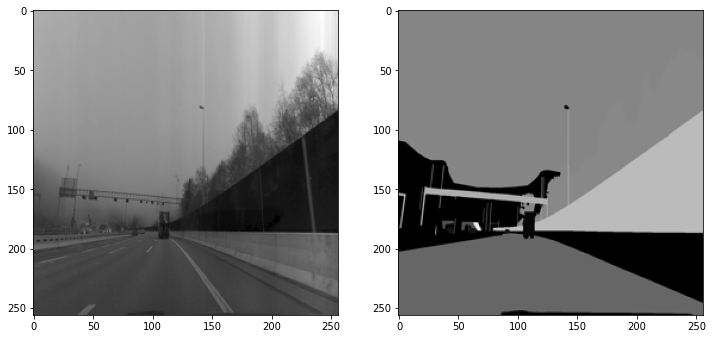

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 1  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_133 (Conv2D)            (None, 256, 256, 16  160         ['input_9[0][0]']                
                                )                                                                 
                                                                                                  
 dropout_63 (Dropout)           (None, 256, 256, 16  0           ['conv2d_133[0][0]']             
                                )                                                          

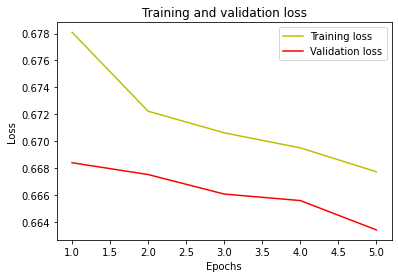

In [ ]:

#Sanity check, view few mages
import random
import numpy as np
image_number = random.randint(0, len(X_train))
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(np.reshape(X_train[image_number], (256, 256)), cmap='gray')
plt.subplot(122)
plt.imshow(np.reshape(y_train[image_number], (256, 256)), cmap='gray')
plt.show()


###############################################################
IMG_HEIGHT = 256
IMG_WIDTH  = 256
IMG_CHANNELS = 1

def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)

model = get_model()

history = model.fit(X_train, y_train, 
                    batch_size = 16, 
                    verbose=1, 
                    epochs=5, 
                    validation_data=(X_test, y_test), 
                    shuffle=False)


############################################################
#Evaluate the model


	# evaluate model
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")


#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:

acc = history.history['acc']
#acc = history.history['accuracy']
val_acc = history.history['val_acc']
#val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##################################
#IOU
y_pred=model.predict(X_test)
y_pred_thresholded = y_pred > 0.5

intersection = np.logical_and(y_test, y_pred_thresholded)
union = np.logical_or(y_test, y_pred_thresholded)
iou_score = np.sum(intersection) / np.sum(union)
print("IoU socre is: ", iou_score)

#######################################################################
#Predict on a few images
model = get_model()
model.load_weights('mitochondria_50_plus_100_epochs.hdf5') #Trained for 50 epochs and then additional 100
#model.load_weights('mitochondria_gpu_tf1.4.hdf5')  #Trained for 50 epochs

test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img_norm, 0)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.2).astype(np.uint8)

test_img_other = cv2.imread('data/test_images/02-1_256.tif', 0)
#test_img_other = cv2.imread('data/test_images/img8.tif', 0)
test_img_other_norm = np.expand_dims(normalize(np.array(test_img_other), axis=1),2)
test_img_other_norm=test_img_other_norm[:,:,0][:,:,None]
test_img_other_input=np.expand_dims(test_img_other_norm, 0)

#Predict and threshold for values above 0.5 probability
#Change the probability threshold to low value (e.g. 0.05) for watershed demo.
prediction_other = (model.predict(test_img_other_input)[0,:,:,0] > 0.2).astype(np.uint8)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')
plt.subplot(234)
plt.title('External Image')
plt.imshow(test_img_other, cmap='gray')
plt.subplot(235)
plt.title('Prediction of external Image')
plt.imshow(prediction_other, cmap='gray')
plt.show()

#plt.imsave('input.jpg', test_img[:,:,0], cmap='gray')
#plt.imsave('data/results/output2.jpg', prediction_other, cmap='gray')

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    
    return model
